# Imports

In [1]:
#normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Gradient Color Bar Plots
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors as mcolors, path

# Data

Create some artificial data

In [2]:
df = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[4,5,6,3,7,1]})

# Basic Plots

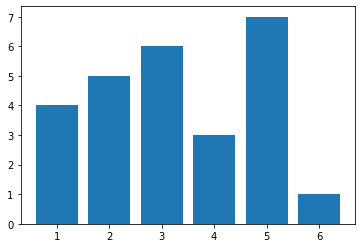

In [3]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b)
plt.show()

# Basic Gradient Plots

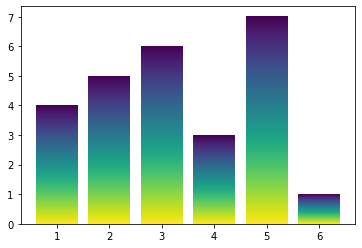

In [4]:
fig, ax = plt.subplots()

def gradientbars(bars):
    #set up the gradient for the cmap
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto")

gradientbars(ax.bar(df.a, df.b))

plt.show()

In [24]:
#show the first 10 elements of grad
np.atleast_2d(np.linspace(0,1,256)).T[0:10]

array([[0.        ],
       [0.00392157],
       [0.00784314],
       [0.01176471],
       [0.01568627],
       [0.01960784],
       [0.02352941],
       [0.02745098],
       [0.03137255],
       [0.03529412]])

# Meaningful Gradient Plots

The key is that the 'grad' variable now represents an array that doesn't always go from 0->1.  It is scaled by the height of each individual bar <br>
We use the cm.colors.NoNorm because we want to use indices directly in a ScalarMappable (as in, USE the custom 'grad' we created) </br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.NoNorm.html

In [5]:
def gradientbars(bars,ydata,cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*h/max(ydata),256)).T
        ax.imshow(grad, extent=[x,x+w,y,y+h], origin='lower',aspect="auto", norm=cm.colors.NoNorm(vmin=0,vmax=1),cmap=plt.get_cmap(cmap))
    

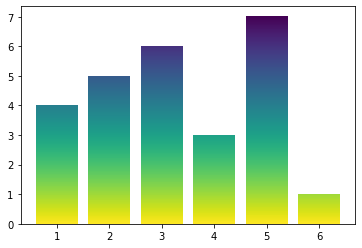

In [6]:
fig, ax = plt.subplots()
my_bar = ax.bar(df.a,df.b)
gradientbars(my_bar, df.b, 'viridis_r')
plt.show()

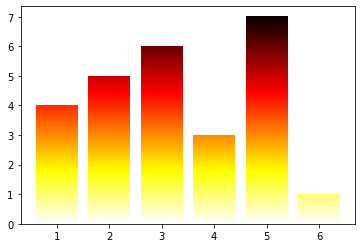

In [7]:
fig, ax = plt.subplots()
my_bar = ax.bar(df.a,df.b)
gradientbars(my_bar, df.b, 'hot_r')
plt.show()

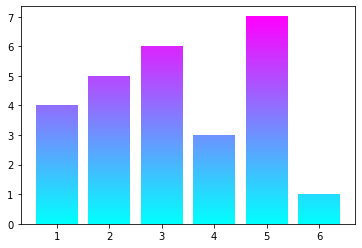

In [8]:
fig, ax = plt.subplots()
my_bar = ax.bar(df.a,df.b)
gradientbars(my_bar, df.b, 'cool')
plt.show()

Let's pretty it up a bit

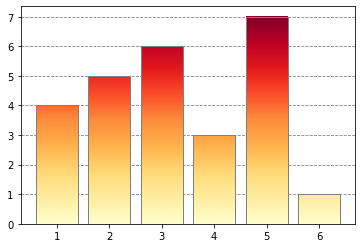

In [25]:
def gradientbars(bars,ydata,cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*h/max(ydata),256)).T
        #zorder of 2 to get gradients above the facecolor, but below the bar outlines
        ax.imshow(grad, extent=[x,x+w,y,y+h], origin='lower',aspect="auto",zorder=2, norm=cm.colors.NoNorm(vmin=0,vmax=1),cmap=plt.get_cmap(cmap))

fig, ax = plt.subplots()
# zorder=0 sends gridlines to the back
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
# zorder=3 makes our edges show
my_bar = ax.bar(df.a,df.b, edgecolor='gray', zorder=3)
gradientbars(my_bar, df.b, 'YlOrRd')
plt.show()

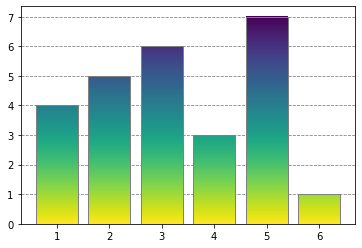

In [34]:
fig, ax = plt.subplots()
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
my_bar = ax.bar(df.a,df.b, edgecolor='gray', zorder=3)
gradientbars(my_bar, df.b, 'viridis_r')
#plt.savefig('cleaned_viridis.png')
plt.show()

# Combinding with custom CMAPs

See my previous article for making custom CMAPs with designated transition points

In [10]:
def two_color_cmap(color1, color2, transition_value, transition_width, plot_min, plot_max): 
    colors=[color1, color1, color2, color2]
    transition = (transition_value - plot_min)/(plot_max - plot_min)
    trans_width_scaled = transition_width / (plot_max - plot_min)
    nodes=[0.0, transition - (trans_width_scaled/2), transition + (trans_width_scaled/2), 1.0]
    new_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return(new_cmap)

In [11]:
my_cmap=two_color_cmap('#2d1da3','#fcba05',4.5,1.5,0,7)

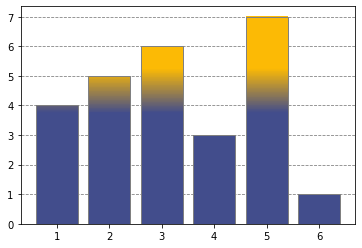

In [12]:
fig, ax = plt.subplots()
#add gridlines
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
#make our 2-color targeted cmap
#my_cmap=two_color_cmap('#2d1da3','#fcba05',4.5,1.5,0,df.b.max())
my_cmap=two_color_cmap('#424d8c','#fcba05',4.5,1.5,0,df.b.max())
#set up a bar plot and bind
my_bar = ax.bar(df.a,df.b, edgecolor='gray', zorder=3)
#apply cmap to bars
gradientbars(my_bar, df.b, my_cmap)
plt.show()

In [13]:
def three_color_cmap(color1, color2, color3, transition_value1, transition_width1, transition_value2, transition_width2, plot_min, plot_max):
    colors=[color1, color1, color2, color2, color3, color3]
    transition1 = (transition_value1 - plot_min)/(plot_max - plot_min)
    transition2 = (transition_value2 - plot_min)/(plot_max - plot_min)
    trans_width_scaled1 = transition_width1 / (plot_max - plot_min)
    trans_width_scaled2 = transition_width2 / (plot_max - plot_min)
    nodes=[0.0, transition1 - (trans_width_scaled1/2), transition1 + (trans_width_scaled1/2), transition2 - (trans_width_scaled2/2), 
           transition2 + (trans_width_scaled2/2), 1.0]
    new_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return(new_cmap)

In [14]:
my_cmap2 = three_color_cmap('#2d1da3', '#fcba05','#fc3b05',3.5,1,4.5,1,0,7)

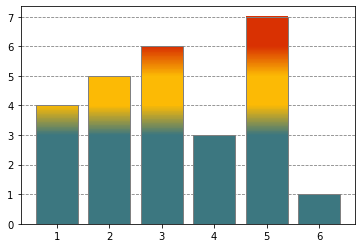

In [15]:
fig, ax = plt.subplots()
#add gridlines
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
#make our 3-color targeted cmap
my_cmap2 = three_color_cmap('#3c7780', '#fcba05','#d93102',3.5,1,5.5,1,0,df.b.max())
#set up a bar plot and bind
my_bar = ax.bar(df.a,df.b, edgecolor='gray', zorder=3)
#apply cmap to bars
gradientbars(my_bar, df.b, my_cmap2)
plt.show()

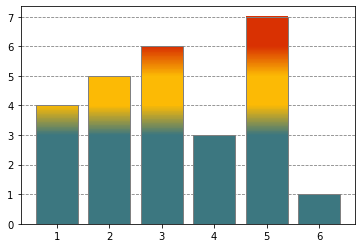

In [35]:
fig, ax = plt.subplots()
#add gridlines
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
#make our 3-color targeted cmap
my_cmap2 = three_color_cmap(color1='#3c7780', color2='#fcba05',color3='#d93102',
                            transition_value1=3.5, transition_width1=1, 
                            transition_value2=5.5, transition_width2=1,
                            plot_min=0,plot_max=df.b.max())
#set up a bar plot and bind
my_bar = ax.bar(df.a,df.b, edgecolor='gray', zorder=3)
#apply cmap to bars
gradientbars(my_bar, df.b, my_cmap2)
plt.show()